In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from category_encoders import TargetEncoder
import openpyxl

In [2]:
# Загрузка данных из файлов с удалением лишних столбцов
df = pd.read_excel('flats.xlsx', usecols=lambda column: column not in ['Unnamed: 57'])
euro_df = pd.read_excel('euro_renovation.xlsx', usecols=lambda column: column not in ['Unnamed: 57'])

In [3]:
df = df.rename(columns={
    '**id:** Идентификатор объекта.': 'id',
    '**offer_views:** Количество просмотров объявления.': 'offer_views',
    '**city:** Город, в котором расположен объект.': 'city',
    '**lat:** Широта местоположения объекта.': 'lat',
    '**lon:** Долгота местоположения объекта.': 'lon',
    '**price_sq:** Цена за квадратный метр.': 'price_sq',
    '7**area:** Площадь объекта.': 'area',
    ' **floor:** Этаж объекта.': 'floor',
    ' **kitchen_area:** Площадь кухни.': 'kitchen_area',
    '**bathroom_type:** Тип ванны.': 'bathroom_type',
    '**balconies:** Количество балконов.': 'balconies',
    '**renovation:** Тип ремонта.': 'renovation',
    '**is_apartment:** Является ли объект квартирой.': 'is_apartment',
    '**rooms:** Количество комнат.': 'rooms',
    '**has_gas:** Наличие газа.': 'has_gas',
    '**house_floors:** Количество этажей в доме.': 'house_floors',
    '**house_wall_type:** Тип стен дома.': 'house_wall_type',
    '**lifts:** Количество лифтов.': 'lifts',
    '**freight_lifts:** Количество грузовых лифтов.': 'freight_lifts',
    '**time_on_foot_to_subway:** Время пешком до метро.': 'time_on_foot_to_subway',
    '**build_year:** Год постройки объекта.': 'build_year',
    '**urgent:** Срочное ли объявление.': 'urgent',
    '**duplicates_count:** Количество дубликатов объявления.': 'duplicates_count',
    '**sale_type:** Тип продажи.': 'sale_type',
    '**all_data.house.ceiling_height:** Высота потолков в доме.': 'ceiling_height',
    ' **all_data.house.has_garbage_disposer:** Наличие мусоропровода в доме.': 'has_garbage_disposer',
    ' **all_data.object_info.living_area:** Жилая площадь объекта.': 'living_area',
    ' **all_data.object_info.loggias:** Количество лоджий.': 'loggias',
    ' **all_data.house.parking[].display_name:** Опции парковки дома.': 'parking',
    ' **all_data.house.yard[].display_name:** Опции двора дома.': 'yard',
    ' **all_data.house.yard[].display_name:** Опции двора дома..1': 'yard_1',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома.': 'infrastructure',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома..1': 'infrastructure_1',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома..2': 'infrastructure_2',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома..3': 'infrastructure_3',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома..4': 'infrastructure_4',
    ' **all_data.object_info.garage_type.display_name:** Тип гаража объекта.': 'garage_type'
})

In [4]:
euro_df = euro_df.rename(columns={
    '**id:** Идентификатор объекта.': 'id',
    '**offer_views:** Количество просмотров объявления.': 'offer_views',
    '**city:** Город, в котором расположен объект.': 'city',
    '**lat:** Широта местоположения объекта.': 'lat',
    '**lon:** Долгота местоположения объекта.': 'lon',
    '**price_sq:** Цена за квадратный метр.': 'price_sq',
    '**area:** Площадь объекта.': 'area',
    '**floor:** Этаж объекта.': 'floor',
    '**kitchen_area:** Площадь кухни.': 'kitchen_area',
    ' **bathroom_type:** Тип ванны.': 'bathroom_type',
    ' **balconies:** Количество балконов.': 'balconies',
    ' **renovation:** Тип ремонта.': 'renovation',
    ' **is_apartment:** Является ли объект квартирой.': 'is_apartment',
    ' **rooms:** Количество комнат.': 'rooms',
    ' **has_gas:** Наличие газа.': 'has_gas',
    ' **house_floors:** Количество этажей в доме.': 'house_floors',
    ' **house_wall_type:** Тип стен дома.': 'house_wall_type',
    ' **lifts:** Количество лифтов.': 'lifts',
    ' **freight_lifts:** Количество грузовых лифтов.': 'freight_lifts',
    ' **time_on_foot_to_subway:** Время пешком до метро.': 'time_on_foot_to_subway',
    ' **build_year:** Год постройки объекта.': 'build_year',
    ' **urgent:** Срочное ли объявление.': 'urgent',
    ' **duplicates_count:** Количество дубликатов объявления.': 'duplicates_count',
    ' **sale_type:** Тип продажи.': 'sale_type',
    ' **all_data.house.ceiling_height:** Высота потолков в доме.': 'ceiling_height',
    ' **all_data.house.has_garbage_disposer:** Наличие мусоропровода в доме.': 'has_garbage_disposer',
    ' **all_data.object_info.living_area:** Жилая площадь объекта.': 'living_area',
    ' **all_data.object_info.loggias:** Количество лоджий.': 'loggias',
    ' **all_data.house.parking[].display_name:** Опции парковки дома.': 'parking',
    ' **all_data.house.yard[].display_name:** Опции двора дома.': 'yard',
    ' **all_data.house.yard[].display_name:** Опции двора дома..1': 'yard_1',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома.': 'infrastructure',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома..1': 'infrastructure_1',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома..2': 'infrastructure_2',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома..3': 'infrastructure_3',
    ' **all_data.house.infrastructure[].display_name:** Инфраструктура дома..4': 'infrastructure_4',
    ' **all_data.object_info.garage_type.display_name:** Тип гаража объекта.': 'garage_type'
})

In [5]:
# Преобразование данных в числовой формат
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df['price_sq'] = pd.to_numeric(df['price_sq'], errors='coerce')
euro_df['area'] = pd.to_numeric(euro_df['area'], errors='coerce')
euro_df['price_sq'] = pd.to_numeric(euro_df['price_sq'], errors='coerce')

In [6]:
# Очистка данных от NaN значений
df.dropna(subset=['area', 'price_sq'], inplace=True)
euro_df.dropna(subset=['area', 'price_sq'], inplace=True)

# Удаление строк, где тип ремонта не указан
if 'renovation' in df.columns:
    df.dropna(subset=['renovation'], inplace=True)
if 'renovation' in euro_df.columns:
    euro_df.dropna(subset=['renovation'], inplace=True)

In [7]:
# Добавление признака 'euro' для указания наличия евроремонта
df['euro'] = 0
euro_df['euro'] = 1

In [8]:
# Объединение данных в один DataFrame
data = pd.concat([df, euro_df], ignore_index=True)

In [9]:
# Преобразование столбца 'renovation' в категориальный тип данных
data['renovation'] = data['renovation'].astype('category')

In [10]:
# Преобразование дополнительных признаков
data['house_floors'] = data['house_floors'].astype('int')
data['lifts'] = data['lifts'].astype('int')
data['freight_lifts'] = data['freight_lifts'].astype('int')
data['has_garbage_disposer'] = data['has_garbage_disposer'].astype('str')
data['living_area'] = data['living_area'].astype('float')
data['build_year'] = data['build_year'].astype('int', errors='ignore')
data['parking'] = data['parking'].astype('category')
data['yard'] = data['yard'].astype('category')
data['infrastructure'] = data['infrastructure'].astype('category')
data['garage_type'] = data['garage_type'].astype('category')

# Создание признаков с помощью TargetEncoder
target_encoder = TargetEncoder()
data['renovation_encoded'] = target_encoder.fit_transform(data['renovation'], data['price_sq'])

# Объединение данных в один DataFrame
df = pd.concat([df, data[['renovation_encoded']]], axis=1)

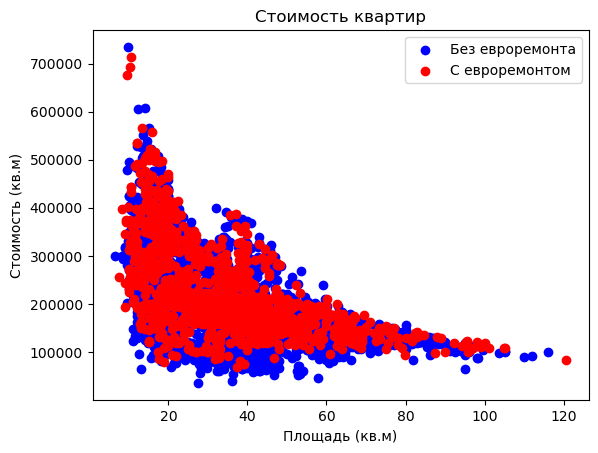

In [11]:
# Визуализация данных
%matplotlib inline
plt.scatter(df['area'], df['price_sq'], color='blue', label='Без евроремонта')
plt.scatter(euro_df['area'], euro_df['price_sq'], color='red', label='С евроремонтом')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Стоимость (кв.м)')
plt.title('Стоимость квартир')
plt.legend()
plt.show()

In [12]:
# Разделение данных на обучающую и тестовую выборку
X = data[['area', 'euro', 'house_floors', 'lifts', 'freight_lifts', 'living_area', 'renovation_encoded']]
y = data['price_sq']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Создание и обучение модели
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search = GridSearchCV(LGBMRegressor(random_state=42, verbose=-1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

In [14]:
# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}, R2: {r2}')

MSE: 3468977237.7533097, MAE: 42415.900640551765, R2: 0.5326244718145239


In [15]:
# Преобразование дополнительных признаков
df['house_floors'] = df['house_floors'].astype('float')
df['lifts'] = df['lifts'].astype('float')
df['freight_lifts'] = df['freight_lifts'].astype('float')
df['living_area'] = df['living_area'].astype('float')

# Добавление столбца с предсказанной ценой в исходный DataFrame
df['predicted_price'] = model.predict(df[['area', 'euro', 'house_floors', 'lifts', 'freight_lifts', 'living_area', 'renovation_encoded']])

# Сохранение результатов в файл
df.to_excel("flats.xlsx", index=False)

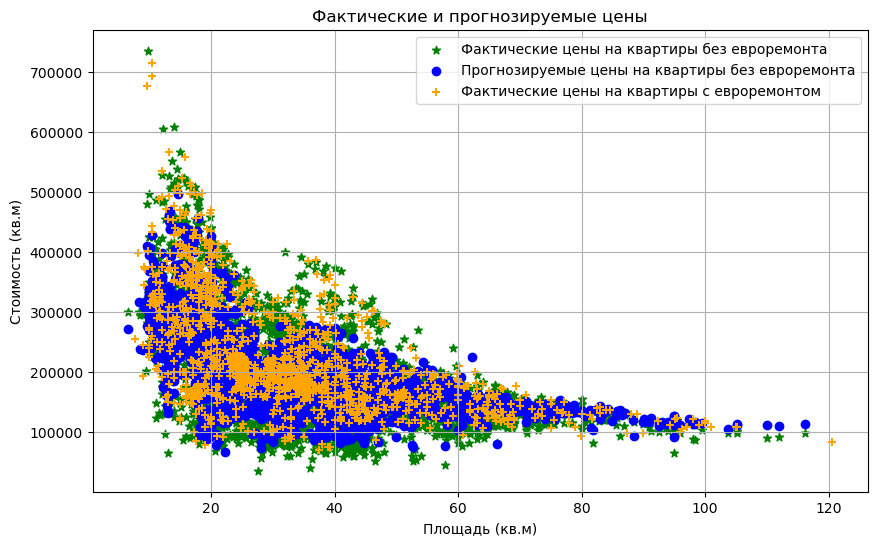

In [16]:
# Визуализация прогнозируемых и фактических данных
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price_sq'], color='green', marker='*', label='Фактические цены на квартиры без евроремонта')
plt.scatter(df['area'], df['predicted_price'], color='blue', marker='o', label='Прогнозируемые цены на квартиры без евроремонта')
plt.scatter(euro_df['area'], euro_df['price_sq'], color='orange', marker='+', label='Фактические цены на квартиры с евроремонтом')
plt.xlabel('Площадь (кв.м)')
plt.ylabel('Стоимость (кв.м)')
plt.title('Фактические и прогнозируемые цены')
plt.legend()
plt.grid()
plt.show()